## **Multiple Linear Regression**

Create a **ML model** to understand the correlation between **R&D Spend**, **Administration**, **Marketing Spend**, and **State** factors and how they impact on the **Startup Profit**

Input = 50_Startups.csv

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt       #graphs
import pandas as pd

# Importing the dataset

In [3]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:,-1].values



In [ ]:
print(X)

# Encoding the Categorical Data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

# Splitting the dataset into the Training Set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Training the MLR model on the Training Set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #MLR model created, deals with dummy var, best accuracy
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),1)),1))

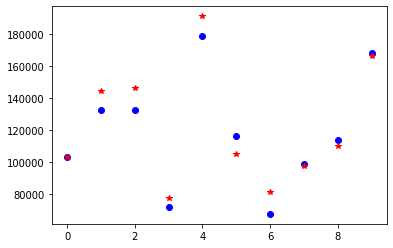

In [17]:
plt.plot(y_pred, 'bo')
plt.plot(Y_test, 'r*')

#Making Predictions:

In [20]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]])) #simulating a random startup from California, R&D=160k, Adm=130k, and Mkt=300k

[181566.92]


#Getting the final linear regression equation with the values of the coefficients

In [21]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853204


#Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$